# 수치 미분(Numerical Differentiation)

**실습을 시작하기 전에, 메뉴의 [런타임]-[런타임 유형 변경]에서 '하드웨어 가속기'를 'CPU'로 선택해야 한다.**

이번 실습에서는 수치 미분(numerical differentiation)을 파이썬으로 구현해보고, 이를 이용해 문제를 풀어보겠다.

우선 필요한 모듈을 불러온다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

우리가 해결할 문제는 다음과 같다.

분포 하중이 작용하는 균일한 재질의 빔(beam)에 대해 다음과 같은 관계가 적용될 수 있다:

$$
\frac{dy}{dx}=\theta (x) \tag{1}
$$
$$
\frac{d\theta}{dx}=\frac{M(x)}{EI} \tag{2}
$$
$$
\frac{dM}{dx}=V(x) \tag{3}
$$
$$
\frac{dV}{dx}=-w(x) \tag{4}
$$

여기서,

$x$: 빔의 길이 방향에 대한 위치($m$)

$y(x)$: 변형 길이($m$)

$\theta(x)$: 기울기($m/m$)

$E$: 탄성계수(modulys of elasticity)($Pa$)

$I$: 관성모멘트(moment of inertia)($m^4$)

$M(x)$: 모멘트(moment)($N\cdot m$)

$V(x)$: 전단력(shear force)($N$)

$w(x)$: 분포 하중($N/m$)

이다.



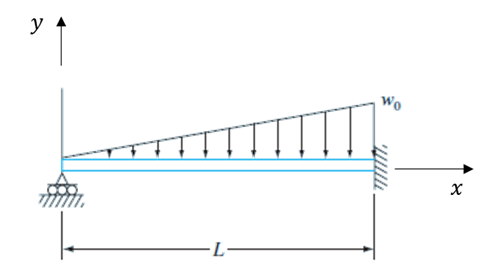

위의 그림과 같이 분포 하중이 선형적으로 증가하는 경우 기울기는 다음과 같이 계산할 수 있다:

$$
\begin{equation}
\theta(x)=\frac{w_0}{120EIL}\left(-5x^4+6L^2x^2-L^4\right) \tag{5}
\end{equation}
$$

이 빔에 대해서 모멘트 $M(x)$, 전단력 $V(x)$ 및 분포하중 $w(x)$를 계산해보자. 이 때, 필요한 파라미터의 값은 다음과 같다:

$$
L=3(m) \\
E=200×10^9(Pa) \\
I=0.0003(m^4) \\
w_0=2.5×10^5(N/m)
$$

우선 이를 저장하는 변수를 정의한다.

In [ ]:
L = 3 # L의 값
E = 200000000000 # E의 값
I = 0.0003 # I의 값
w0 = 250000 # w0의 값

## 함수 $\theta(x)$ 정의하기

우선 함수 $\theta(x)$를 파이썬 함수로 구현한다. 구현해야 할 함수 $\theta(x)$는 입력으로 변수 *x*를 받아서 **식 (5)**를 계산해야 한다.

**지시: 아래에 함수 *func_theta*를 완성하시오.**

In [ ]:
def func_theta(x):
  ## 식 (5)를 계산하고 이를 반환하는 함수를 만드시오.
  ## 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  theta = x
  #### 코드 종료

  return theta

위에 만든 함수 *func_theta*를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
x_test = np.array([0, 1.5, 3])
theta_test = func_theta(x_test)
print(theta_test)

assert len(theta_test) == 3
assert abs(theta_test[0] + 0.0009375) < 0.0001
assert abs(theta_test[1] - 0.00017578) < 0.0001
assert abs(theta_test[2]) < 0.0001

print("성공!!")

함수 $\theta (x)$의 그래프를 출력해보자.

In [ ]:
x_line = np.linspace(0, L, 100) # x축을 100개의 구간으로 나눈다.
theta_line = func_theta(x_line)

_, ax = plt.subplots()
ax.plot(x_line, theta_line)
ax.set_title("Theta")
ax.set_xlabel("x(m)")
ax.set_ylabel("theta(x)")
ax.grid()
ax.plot()

## 모멘트 계산

함수 $\theta(x)$로부터 모멘트를 계산해보자. **식 (2)**로부터

$$
\frac{d\theta}{dx}=\frac{M(x)}{EI} \tag{2}
$$

모멘트 $M(x)$는 다음과 같이 계산할 수 있다:

$$
M(x)={EI}\frac{d\theta(x)}{dx} \tag{6}
$$

**식 (6)**을 계산하기 위해 수치 미분을 사용한다. 수치 미분은 모든 $x$에 대해 계산할 수 없으므로, $h=0.125(m)$ 간격으로 계산하겠다. 이 때, 시작 위치 $x=0(m)$에서는 전향 차분법(forward differentiation)을 이용하고, 끝 위치 $x=3(m)$에서는 후향 차분법(backward differentiation)을 이용한다. 그리고 나머지 위치들에서는 중심 차분법(central differentiation)을 이용한다.

각 방법에 대한 식은 다음과 같다:

**전향 차분(forward differentiation):**
$$
f^\prime\left(x_i\right)=\frac{f\left(x_{i+1}\right)-f\left(x_i\right)}{h}\tag{7}
$$

**후향 차분(backward differentiation):**
$$
f^\prime\left(x_i\right)=\frac{f\left(x_i\right)-f\left(x_{i-1}\right)}{h}\tag{8}
$$

**중심 차분(central differentiation):**
$$
f^\prime\left(x_i\right)=\frac{f\left(x_{i+1}\right)-f\left(x_{i-1}\right)}{2h}\tag{9}
$$

**식(7)~(9)**를 참고하여 미분을 계산하는 파이썬 함수를 만들어보자.

**지시: 아래에 함수 *diff*를 완성하시오.**

In [ ]:
def diff(f, h):
  """
  함수 diff는 수치 미분을 계산한다.
  이때, 시작 위치에서는 전향 차분, 끝 위치에서는 후향 차분을 계산한다.
  그리고 나머지 위치에서는 중심 차분을 계산한다.
  입력 매개변수:
    f : 각 x에서의 미분할 함수값을 나타내는 백터. 즉 f(x)의 값
    h : x의 간격
  출력 매개변수:
    result : 각 x에서 함수 f(x)를 미분한 값
  """

  # 결과를 저장할 변수
  result = []

  ## 시작 위치에서 전향 차분을 계산하기 위해 식 (7)을 계산하도록 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  df = f[0]
  #### 코드 종료 ####
  result.append(df)

  # 중간 위치에서 중심 차분을 계산한다.
  for i in range(1, len(f) - 1):
    ## i번째 위치에서 중심 차분을 계산하기 위해 식 (9)를 계산하도록 코드를 적절히 수정하시오.
    #### 코드 시작 ####
    df = f[0]
    #### 코드 종료 ####
    result.append(df)

  ## 끝 위치에서 후향 차분을 계산하기 위해 식 (8)을 계산하도록 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  df = f[0]
  #### 코드 종료 ####
  result.append(df)

  # Numpy 배열로 변환하여 반환한다.
  return np.array(result)

위에 만든 함수 *diff*를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
def test_func(x):
  return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

x = np.linspace(0, 0.8, 3)
y = test_func(x)
test_df = diff(y, 0.4)
print(test_df)

assert len(test_df) == 3
assert abs(test_df[0] - 5.64) < 0.0001
assert abs(test_df[1] - 0.04) < 0.0001
assert abs(test_df[2] + 5.56) < 0.0001

print("성공!!")

앞에서 만든 함수 *diff*를 이용해 모멘트를 계산한다.

**지시: 식 (6)를 이용해 모멘트를 계산하도록 아래 코드를 완성하시오.**

In [ ]:
# 미분할 위치 간격
h = 0.125
# 미분할 위치를 계산한다.
x = np.arange(0, L + h, h)
# 각 위치 x에서 theta 값을 구하기 위해 식(5)를 계산한다.
theta = func_theta(x)

# 식 (6)을 계산하는 코드를 완성하시오.
#### 코드 시작 ####
M = theta
#### 코드 종료 ####

앞에서 계산한 $M$을 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
assert len(M) == 25
assert abs(M[0] - 4680.71831597) < 0.0001
assert abs(M[1] - 9320.74652778) < 0.0001
assert abs(M[-2] + 115049.91319444) < 0.0001
assert abs(M[-1] + 131894.25998264) < 0.0001

print("성공!!")

비교를 위해 **식(6)**을 정확히 계산하면 다음과 같다:
$$
M(x)=\frac{w_0}{120L}(-20x^3+12L^2x) \tag{10}
$$

$M(x)$를 계산한 결과를 출력한다.

In [ ]:
# 식 (10)
def func_M(x):
  return w0 / (120 * L) * (-20 * x**3 + 12 * L**2 * x)

# 식 (10)을 이용해 정확한 결과를 계산한다.
x_line = np.linspace(0, L, 100) # x축을 100개의 구간으로 나눈다.
M_line = func_M(x_line)

x = np.arange(0, L + 0.125, 0.125)

# 오차를 계산한다.
error = np.abs(func_M(x) - M)

# 그래프를 그린다.
_, axes = plt.subplots(2)

ax = axes[0]
ax.plot(x_line, M_line)
ax.plot(x, M)
ax.legend(["exact", "numerical"])
ax.set_xlabel("x(m)")
ax.set_ylabel("M(x)")
ax.grid()

ax = axes[1]
ax.plot(x, error)
ax.set_xlabel("x(m)")
ax.set_ylabel("Error")
ax.grid()

위의 그래프를 보면, 시작 위치($x=0$)와 끝 위치($x=3$)에서 오차가 큰 것을 확인할 수 있다. 이를 개선하기 위해 시작 위치와 끝 위치에서 오차가 $O(h^2)$인 고정도 공식을 이용한다. 이 공식은 다음과 같다:

**전향 차분(forward differentiation):**
$$
f^\prime\left(x_i\right)=\frac{-f\left(x_{i+2}\right)+4f\left(x_{i+1}\right)-3f\left(x_i\right)}{2h} \tag{11}
$$

**후향 차분(backward differentiation):**
$$
f^\prime\left(x_i\right)=\frac{3f\left(x_i\right)-4f\left(x_{i-1}\right)+f\left(x_{i-2}\right)}{2h} \tag{12}
$$

**식(11)**과 **식 (12)**를 참고하여 함수 *diff*를 개선한 함수 *diff2*를 구현하시오.

**지시: 아래에 함수 *diff2*를 완성하시오.**

In [ ]:
def diff2(f, h):
  """
  함수 diff2는 수치 미분을 계산한다.
  이때, 시작 위치에서는 O(h^2) 전향 차분, 끝 위치에서는 O(h^2) 후향 차분을 계산한다.
  그리고 나머지 위치에서는 O(h)인 중심 차분을 계산한다.
  입력 매개변수:
    f : 각 x에서의 미분할 함수값을 나타내는 백터. 즉 f(x)의 값
    h : x의 간격
  출력 매개변수:
    result : 각 x에서 함수 f(x)를 미분한 값
  """

  # 결과를 저장할 변수
  result = []

  ## 시작 위치에서 O(h^2) 전향 차분을 계산하기 위해 식 (11)을 계산하도록 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  df = f[0]
  #### 코드 종료 ####
  result.append(df)

  # 중간 위치에서 중심 차분을 계산한다.
  for i in range(1, len(f) - 1):
    ## i번째 위치에서 O(h) 중심 차분을 계산하기 위해 식 (9)를 계산하도록 코드를 적절히 수정하시오.
    ## 이 코드는 diff와 동일하다.
    #### 코드 시작 ####
    df = f[0]
    #### 코드 종료 ####
    result.append(df)

  ## 끝 위치에서 O(h^2) 후향 차분을 계산하기 위해 식 (12)를 계산하도록 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  df = f[0]
  #### 코드 종료 ####
  result.append(df)

  # Numpy 배열로 변환하여 반환한다.
  return np.array(result)

위에 만든 함수 *diff2*를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
def test_func(x):
  return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

x = np.linspace(0, 0.8, 3)
y = test_func(x)
test_df = diff2(y, 0.4)
print(test_df)

assert len(test_df) == 3
assert abs(test_df[0] - 11.24) < 0.0001
assert abs(test_df[1] - 0.04) < 0.0001
assert abs(test_df[2] + 11.16) < 0.0001

print("성공!!")

앞에서 만든 함수 *diff2*를 이용해 모멘트를 다시 계산한다.

**지시: 식 (6)과 함수 diff2를 이용해 모멘트를 계산하도록 아래 코드를 완성하시오.**

In [ ]:
# 미분할 위치 간격
h = 0.125
# 미분할 위치를 계산한다.
x = np.arange(0, L + h, h)
# 각 위치 x에서 theta 값을 구하기 위해 식(5)를 계산한다.
theta = func_theta(x)

# 식 (6)을 계산하는 코드를 완성하시오.
#### 코드 시작 ####
M = theta
#### 코드 종료 ####

$M(x)$를 계산한 결과를 출력한다.

In [ ]:
# 식 (10)
def func_M(x):
  return w0 / (120 * L) * (-20 * x**3 + 12 * L**2 * x)

# 식 (10)을 이용해 정확한 결과를 계산한다.
x_line = np.linspace(0, L, 100) # x축을 100개의 구간으로 나눈다.
M_line = func_M(x_line)

x = np.arange(0, L + 0.125, 0.125)

# 오차를 계산한다.
error = np.abs(func_M(x) - M)

# 그래프를 그린다.
_, axes = plt.subplots(2)

ax = axes[0]
ax.plot(x_line, M_line)
ax.plot(x, M)
ax.legend(["exact", "numerical"])
ax.set_xlabel("x(m)")
ax.set_ylabel("M(x)")
ax.grid()

ax = axes[1]
ax.plot(x, error)
ax.set_xlabel("x(m)")
ax.set_ylabel("Error")
ax.grid()

위의 그래프를 보면 시작 위치와 끝 위치에서 오차가 줄어든 것을 볼 수 있다.

## 전단력 계산

**식 (3)**으로부터 전단력은 다음과 같이 계산할 수 있다:

$$
V(x)=\frac{dM(x)}{dx} \tag{13}
$$

앞에서 만든 함수 *diff2*를 이용해 전단력을 계산한다. 이때, $M(x)$는 앞에서 계산한 모멘트를 이용하면 된다.

**지시: 식 (13)과 함수 diff2를 이용해 전단력을 계산하도록 아래 코드를 완성하시오.**


In [ ]:
# 미분할 위치 간격
h = 0.125
# 미분할 위치를 계산한다.
x = np.arange(0, L + h, h)

# 식 (13)을 계산하는 코드를 완성하시오. 이때, 앞에서 이미 계산한 M을 활용한다.
#### 코드 시작 ####
V = M
#### 코드 종료 ####
print(V)

앞에서 계산한 $V$를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
assert len(V) == 25
assert abs(V[0] - 74728.73263889) < 0.0001
assert abs(V[1] - 73752.17013889) < 0.0001
assert abs(V[-2] + 262185.32986111) < 0.0001
assert abs(V[-1] + 276833.76736111) < 0.0001

print("성공!!")


비교를 위해 **식(13)**을 정확히 계산하면 다음과 같다:
$$
V(x)=\frac{w_0}{120L}(-60x^2+12L^2) \tag{14}
$$

$V(x)$를 계산한 결과를 출력한다.

In [ ]:
# 식 (14)
def func_V(x):
  return w0 / (120 * L) * (-60 * x**2 + 12 * L**2)

x_line = np.linspace(0, L, 100) # x축을 100개의 구간으로 나눈다.
V_line = func_V(x_line)

x = np.arange(0, L + 0.125, 0.125)

# 오차를 계산한다.
error = np.abs(func_V(x) - V)

# 그래프를 그린다.
_, axes = plt.subplots(2)

ax = axes[0]
ax.plot(x, M)
ax.plot(x_line, M_line)
ax.legend(["numerical", "exact"])
ax.set_xlabel("x(m)")
ax.set_ylabel("V(x)")
ax.grid()

ax = axes[1]
ax.plot(x, error)
ax.set_xlabel("x(m)")
ax.set_ylabel("Error")
ax.grid()

수고하셨습니다.